# MEGN 570 HW 4 - Charge Transfer Modeling

We will model charge transfer at an SOFC anode, where O$^{2-}$ in the electrolyte reacts with 2 hydrogen atoms adsorbed on a Ni surface (H$_{\rm Ni(s)}$) to form adsorbed water (H$_2$O$_{\rm Ni(s)}$) and electrons in the Ni (e$^-_{\rm Ni}$).

$$\mathrm{O^{2-}_{elyte(s)} + 2\,H_{Ni(s)} \leftrightarrows \left[\,\right]_{elyte(s)} + H_2O_{Ni(s)} + \left[\,\right]_{Ni(s)}+ 2\,e^-_{Ni}  }$$

where $\left[\,\right]_{\rm elyte}$ is a surface vacancy on the ceramic electrolyte surface, where the oxide formerly resided, and $ \left[\,\right]_{Ni(s)}$ is a vacancy on the Ni surface.  

We are going to plot the charge transfer current density as a function of the double layer potential $\Delta\phi = \phi_{\rm an} - \phi_{\rm elyte}$ for $-1.0 \leq \Delta \phi \leq 0.15\,{\rm V}$.

For this reaction, the standard concentration for the Ni surface is the total site density, $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)} = 2.6\times10^{-8}\,\frac{\rm kmol}{m^2}$, and for the electrolyte it is the total electrolyte surface site density: $C_{\rm elyte}^\circ =\Gamma_{\rm YSZ(s)} =  46.05\,\frac{\rm kmol}{\rm m^2}$

The species thermo and forward rate coefficient are provided for you.

## Part 1:  Elementary mass action kinetics.

Calculate the current density as a function of the electric potential, using elementary mass-action kinetics.  The only requirement is that you provide an equation for `i_elementary[i]`, which calculates the current density (A m%^{-2}$) for each electric potential value.  How you get to that value is up to you.

The actual answers are plotted with your equation, to verify.  

Note that we define positive current as positive charge moving _to_ the electrode, and the electric potential as $\Delta \phi = \phi_{\rm an} - \phi_{\rm elyte}$.  As we are sweeping from $\Delta \phi=0.15$ to $\Delta \phi = -1.0$, should the current get more positive or more negative?

Assume the following conditions:

- $\theta_{\rm H_{Ni(s)}} = 0.6$
- $\theta_{\rm H_2O_{Ni(s)}} = 0.2$
- $\theta_{\rm \left[\,\right]_{Ni(s)}} = 0.2$
- $\theta_{\rm O^{2-}_{elyte(s)}} = 0.92$
- $\theta_{\rm \left[\,\right]_{elyte(s)}} = 0.08$
- $T = 800^\circ$ C

The $k_{\rm fwd}$ value given below is in units that will results in a current given in A m$^{-2}$.

### Import modules:

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, log

### Givens

In [6]:
F = 96485e3    # Faraday's constant, C/kmol equivalent charge
R = 8314.5     # Gas constant, J/kmol-K

k_fwd = 4.16307062e+7 # Chemical forward rate constant, m^4/kmol^2/s

C_elyte = 46.05    # Total (reference) elyte concentration, kmol/m3
C_Ni_s = 2.6e-08   # Total (reference) concentration of Ni surface sites, kmol/m2

X_H_Ni = 0.6
X_H2O_Ni = 0.2
X_Vac_Ni = 0.2
X_Vac_elyte = 0.08
X_Ox_elyte = 0.92

"Species standard-state thermo"
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_Ni_o = 0.0              # standard-state gibbs energy for Ni surface vacancy (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)

# Validated (i.e. correct :) results.  We will use these to check our answers:
E_validate = np.array([-0.9, -0.86724138, -0.83448276, -0.80172414, -0.76896552, 
                    -0.7362069, -0.70344828, -0.67068966, -0.63793103, -0.60517241, 
                    -0.57241379, -0.53965517, -0.50689655, -0.47413793, -0.44137931, 
                    -0.40862069, -0.37586207, -0.34310345, -0.31034483, -0.27758621, 
                    -0.24482759, -0.21206897, -0.17931034, -0.14655172,  -0.1137931, 
                    -0.08103448, -0.04827586, -0.01551724,  0.01724138,  0.05])
i_validate = np.array([ 131.74413417,   92.44282478,   64.86313049,   45.50798636,   31.9231884,
                    22.38620407,   15.68775772,   10.97849611,    7.66129177,    5.31552803,
                    3.64376548,    2.43402707,    1.53291973,    0.82618438,    0.22420799,
                    -0.34933914,   -0.96718197,   -1.70766206,   -2.66467121,   -3.95955677,
                    -5.75650834,   -8.28337676,  -11.86056524,  -16.94165607,  -24.17092413,
                    -34.46503005,  -49.12925142,  -70.02299007,  -99.79554155, -142.22202185])

### Add some calculations to the following code block:

$i=nFq$ <br>
$q=k_{f}* \frac{(C_{vacNi}*C_{WNi}*C_{vacYSZ})}{(C_{O2}*(C_{HNi}^{2})}*exp\Bigg(\frac{-\alpha*n*F*\Delta \phi)}{(RT)}\Bigg )-k_{r}* \frac{(C_{O2}*(C_{HNi}^{2})}{(C_{vacNi}*C_{WNi}*C_{vacYSZ})}*exp\Bigg(\frac{1-\alpha*n*F*\Delta \phi)}{(RT)}\Bigg)  $ <br>

$ k_{r}= k_{f}/(exp \Bigg (\frac{-\Delta G^{\circ}_{rxn}}{RT} \Bigg ) \Pi$

In [10]:
# Loop over these delta phi =aa phi_anode - phi_elyte values:
delta_phi = np.linspace(-1,0.15,100)
i_elementary = np.zeros_like(delta_phi)

alpha = 0.5
T = 800+273
n = -2
C_HNi = X_H_Ni*C_Ni_s
C_WNi = X_H2O_Ni*C_Ni_s
C_vacNi = X_Vac_Ni*C_Ni_s
C_O2 = X_Ox_elyte*C_elyte
C_vacYSZ = X_Vac_elyte*C_elyte

prodf= C_O2*(C_HNi**2)
prodr=C_vacYSZ*C_WNi*C_vacNi
dGo = (g_H2O_Ni_o-(g_Ox_elyte_o+(2*g_H_Ni_o)))
dG= dGo + ((R*T)*np.log(prodr/prodf))
#print (-dG/(n*F))


k_rev = k_fwd/(exp((-1*dG)/(R*T))*(prodr/prodf))


for ind, E in enumerate(delta_phi):
 #     print(ind,E)
 # \ is an escape character
    

    i_elementary[ind] = n*F*((k_fwd*(exp((-alpha*n*F*(delta_phi[ind]))/(R*T)))*prodf)-(k_rev*(exp((1-alpha)*n*F*(delta_phi[ind])/(R*T)))*prodr))
    



Plot the results:

Text(0, 0.5, 'Current [A/m2]')

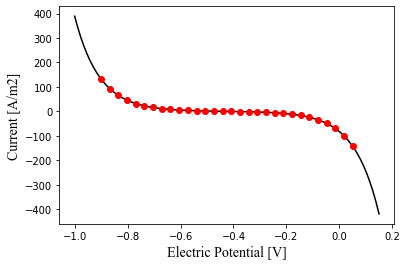

In [11]:
fig1, ax1 = plt.subplots()
ax1.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k')
# ax1.set_xlim([-1,.1])
# ax1.set_ylim([-5500, 55000])
ax1.plot(E_validate,i_validate,'ro',linewidth = 1.5)
ax1.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax1.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

Text(0, 0.5, 'Current [A/m2]')

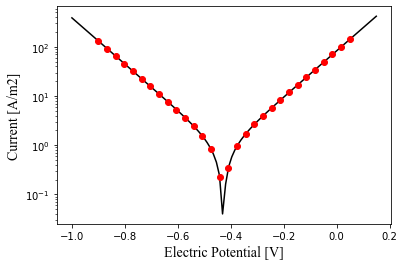

In [12]:
fig2, ax2 = plt.subplots()
ax2.semilogy(delta_phi,abs(i_elementary),linewidth = 1.5,color = 'k')
ax2.semilogy(E_validate,abs(i_validate),'ro',linewidth = 1.5)
ax2.set_xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
ax2.set_ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)

### Discussion:

Add some text to _THIS MARKDOWN BLOCK_ to discuss the plots above.  

Do they make sense, and match with your understanding of the theory?  In what ways? Do they match the validatiopn data?  If not, what might be missing from your code?

The model closely aligns with the data points,indicating the validity of mass-action model within this potential range. Conceptually, this result makes sense as the model is developed using both kinetic and equilibrium considerations, so neither is neglected.

The figures are symmetrical about the equilibrium potential. One side is the anodic current while the other is cathodic, and the two will have opposite signs since one side has electrons leaving and the other side has electrons joining. It makes sense for each side to be symmetrical since there is an alpha=0.5. This value simply means the forward and reverse reaction rates contribute equally to the overall reaction rate. In conclusion, the model makes sense with the parameters that went into the model development and its validity is confirmed by the data.

## ii. Part 2: Butler-Volmer kinetics  

Now use your derivation to calculate $i_\circ$ as a function of your elementary kinetic parameters, and then calculate the currents for the same range of potentials.

Add some code to the block below:

In [44]:
#i_o=n*F*(k_fwd**(1-alpha))*(k_rev**alpha)*(((C_vacNi**(1-alpha))*(C_WNi**(1-alpha))*(C_vacYSZ**(1-alpha)))/((C_O2**alpha)*(C_HNi**(2*alpha))))

i_o=n*F*(k_fwd**(1-alpha))*(k_rev**alpha)*(prodf**(1-alpha))*(prodr**alpha)

i_BV = np.zeros_like(delta_phi)

for ind, E in enumerate(delta_phi):
    eta=E-(-dG/(n*F))
   # print (E)   
    i_BV[ind] = i_o*(exp(-alpha*n*F*eta/(R*T))-(exp((1-alpha)*n*F*eta/(R*T))))
 
    

#### Let's plot the BV and Marcus currents together:

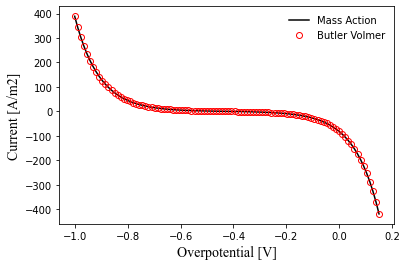

In [14]:
plt.close('all')
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'ro',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer'],frameon=False)
plt.show()

#### Discussion:

Discuss your plots.  Make new plots, as desired, to aid in your discussion and highlight noteworthy results.

How do you feel about the assumption of constant $i_\circ$?  Are there situations where this is _not_ a good assumption?

The BV model matches similarly with the M-A model within this potential range. This agreement makes sense since they are the same equation, just formulated differently based on the ability to practically work with the parameters in each equation. 

The assumtion of constant $i_\circ$ should be accurate as long as the temperature and concentrations remains the same. However, as the SOFC is being operated, the concentrations will change, thus altering $i_\circ$. This model here is a snapshot in time where the concentrations are not changing. Thus, under real operation conditions, the assumption of constant $i_\circ$ will only stay accurate for short periods of SOFC operation(minimal change to concentrations).

### C. Tafel current

We can re-use the same parameters ($i_\circ$, $\beta$, etc.) from the Butler-Volmer expression to calculate the current using the Tafel approximation:

In [50]:
i_Tafel = np.zeros_like(delta_phi)

for ind, E in enumerate(delta_phi):
    eta=E-(-dG/(n*F))
    i_Tafel[ind] =i_o*exp((-alpha*n*F*eta)/(R*T))
   
 

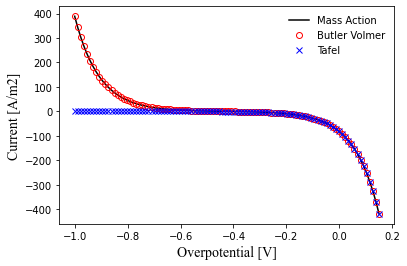

In [51]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

In [52]:
i_Tafel = np.zeros_like(delta_phi)

for ind, E in enumerate(delta_phi):
    eta=E-(-dG/(n*F))
    i_Tafel[ind] =i_o*(-exp(((1-alpha)*n*F*eta)/(R*T)))
   
 

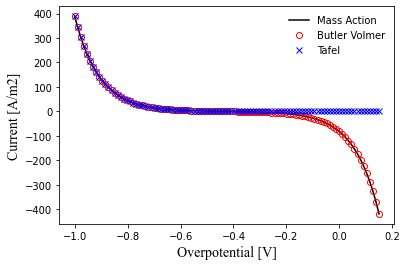

In [53]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Overpotential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.show()

### Disucssion: 
What do you notice, from these results?  What from the theory can explain what you sese.

#### Play with the limits, below, to highlight trends which support your discussion claims.

Feel free to copy the following code block and zoom in on different regions.

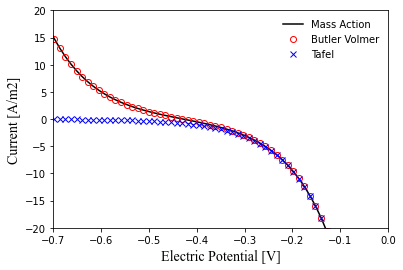

In [43]:
plt.plot(delta_phi,i_elementary,linewidth = 1.5,color = 'k');
plt.plot(delta_phi,i_BV,'o',markeredgecolor='r',markerfacecolor='none');
plt.plot(delta_phi,i_Tafel,'x',markeredgecolor='b',markerfacecolor='none');
plt.xlabel('Electric Potential [V]',family='Times New Roman',fontsize=14)
plt.ylabel('Current [A/m2]',family='Times New Roman',fontsize=14)
plt.legend(['Mass Action','Butler Volmer','Tafel'],frameon=False)
plt.xlim((-0.7,0))
plt.ylim((-20,20))
plt.show()

#### Discussion:


While the BV and MA models closely align with each other at a relatively wide range of potentials, the Tafel model is an approximation only valid at either high or low overpotentials (first figure shows high overpotential, second figure shows low overpotential). Under these limiting conditions, only one term of the BV equation dominates. The accuracy of neglecting the smaller term is valid only at these limiting conditions. At the equilibrium potential  near -0.4V, we see Tafel become inaccurate, since the neglected term is no longer insignificant. 